<a href="https://www.kaggle.com/code/surajbansi28/diabetes-detection-through-retinopathy?scriptVersionId=226694352" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms, datasets
from typing import List, Tuple, Dict
from PIL import Image
from tqdm.auto import tqdm
from timeit import default_timer as timer

In [ ]:
torch.cuda.empty_cache()

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Set device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
train_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/train"
test_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/test"
val_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/val"

data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor()
])

# Create ImageFolders for train, val and test datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # transform for the data
                                  target_transform=None) # transform for the label/target
val_data = datasets.ImageFolder(root=val_dir,
                                transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data.classes, test_data.classes, val_data.classes

In [ ]:
from torch.utils.data import DataLoader

# Define batch size
batch_size = 32  

# Create data loaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load a pre-trained ResNet model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)

# Modify the final layer to match our number of classes (5 for DR severity levels)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)  # 5 output classes (No_DR, Mild, Moderate, Severe, Proliferative_DR)

# Move the model to GPU (if available)
model = model.to(device)


In [ ]:
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)


In [ ]:
#Training the Model.
num_epochs = 10  # Adjust based on performance

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")


In [ ]:
model.eval()  # Set model to evaluation mode
correct, total = 0, 0

with torch.no_grad():  # No gradient updates in validation
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        
        _, predicted = torch.max(outputs, 1)  # Get highest probability class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy:.2f}%")


In [ ]:
# Save model
torch.save(model.state_dict(), "diabetic_retinopathy_model.pth")
print("Model saved successfully!")


In [1]:
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms, datasets
from PIL import Image
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.cuda.empty_cache()
torch.manual_seed(42)
torch.cuda.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"

# Download dataset
kushagratandon12_diabetic_retinopathy_balanced_path = kagglehub.dataset_download('kushagratandon12/diabetic-retinopathy-balanced')

train_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/train"
test_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/test"
val_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/val"

# Data transformation
data_transform = transforms.Compose([
    transforms.Resize(size=(299, 299)),  # Adjusted for InceptionV3
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor()
])

# Load datasets
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform)
val_data = datasets.ImageFolder(root=val_dir, transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)




Epoch 1, Loss: 0.9687517478185541
Epoch 2, Loss: 0.7467985416981665
Epoch 3, Loss: 0.6046314702150138
Epoch 4, Loss: 0.5117159968187266
Epoch 5, Loss: 0.4382586518768221
Epoch 6, Loss: 0.37056983901899965
Epoch 7, Loss: 0.3161741023855832
Epoch 8, Loss: 0.2693511610782212
Epoch 9, Loss: 0.22992058602839655
Epoch 10, Loss: 0.19950950499418574
Model saved to inceptionv3_diabetic_retinopathy.pt
Validation Accuracy: 82.17%


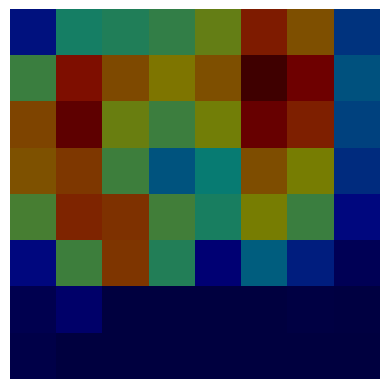

In [4]:
# Load InceptionV3 model
model = models.inception_v3(pretrained=True, aux_logits=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)  # 5 classes
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

# Save the trained model
model_path = "inceptionv3_diabetic_retinopathy.pt"
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

# Validation
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy:.2f}%")

# Grad-CAM Implementation
def get_grad_cam(model, image, target_layer):
    model.eval()
    gradients = []
    activations = []
    
    def save_gradient(grad):
        gradients.append(grad)
    
    def forward_hook(module, input, output):
        activations.append(output)
        output.register_hook(save_gradient)
    
    target_layer.register_forward_hook(forward_hook)
    
    image = image.unsqueeze(0).to(device)
    output = model(image)
    class_idx = output.argmax(dim=1).item()
    score = output[:, class_idx].squeeze()
    
    model.zero_grad()
    score.backward()
    
    gradient = gradients[0].cpu().data.numpy()[0]
    activation = activations[0].cpu().data.numpy()[0]
    
    weights = np.mean(gradient, axis=(1, 2))
    cam = np.sum(weights[:, np.newaxis, np.newaxis] * activation, axis=0)
    cam = np.maximum(cam, 0)
    cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam))
    
    return cam

# Example usage with test image
sample_image, _ = test_data[0]
target_layer = model.Mixed_7c
cam = get_grad_cam(model, sample_image, target_layer)

plt.imshow(sample_image.permute(1, 2, 0))
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.axis('off')
plt.show()

In [2]:
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms, datasets
from PIL import Image
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.cuda.empty_cache()
torch.manual_seed(42)
torch.cuda.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"

# Download dataset
kushagratandon12_diabetic_retinopathy_balanced_path = kagglehub.dataset_download('kushagratandon12/diabetic-retinopathy-balanced')

train_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/train"
test_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/test"
val_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/val"

# Data transformation
data_transform = transforms.Compose([
    transforms.Resize(size=(299, 299)),  # Adjusted for InceptionV3
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor()
])

# Load datasets
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform)
val_data = datasets.ImageFolder(root=val_dir, transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

In [8]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
import numpy as np

# Load InceptionV3 model with pretrained weights
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model with aux_logits=True first
weights = models.Inception_V3_Weights.DEFAULT  # Get pretrained weights
model = models.inception_v3(weights=weights, aux_logits=True)  # Must keep aux_logits=True to load weights

# Disable aux_logits by removing the auxiliary classifier
model.aux_logits = False  # Set to False
model.AuxLogits = None  # Remove auxiliary classifier

# Replace the final fully connected (fc) layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)  # 5 output classes

model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

# Early stopping parameters
patience = 5  # Stop if validation loss does not improve for 5 epochs
best_val_loss = np.inf
counter = 0

num_epochs = 50  # Increase as needed

# Training loop with Early Stopping
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)  # No .logits needed
        loss = criterion(outputs, labels)  
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader)
    
    # Validation Phase
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # No .logits needed
            loss = criterion(outputs, labels)  
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)  # No .logits needed
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total

    print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val Accuracy: {val_accuracy:.2f}%")

    # Early Stopping Check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
        torch.save(model.state_dict(), "model_best.pt")  # Save the best model
        print("✅ Model improved. Saved as model_best.pt")
    else:
        counter += 1
        print(f"⏳ No improvement for {counter} epochs...")

        if counter >= patience:
            print("⛔ Early stopping triggered! Training stopped.")
            break  # Stop training if no improvement

print("Training completed!")


Epoch 1 | Train Loss: 0.9684 | Val Loss: 0.7697 | Val Accuracy: 68.29%
✅ Model improved. Saved as model_best.pt
Epoch 2 | Train Loss: 0.7415 | Val Loss: 0.6744 | Val Accuracy: 70.99%
✅ Model improved. Saved as model_best.pt
Epoch 3 | Train Loss: 0.6076 | Val Loss: 0.5807 | Val Accuracy: 75.15%
✅ Model improved. Saved as model_best.pt
Epoch 4 | Train Loss: 0.5130 | Val Loss: 0.5369 | Val Accuracy: 76.48%
✅ Model improved. Saved as model_best.pt
Epoch 5 | Train Loss: 0.4362 | Val Loss: 0.5153 | Val Accuracy: 78.06%
✅ Model improved. Saved as model_best.pt
Epoch 6 | Train Loss: 0.3738 | Val Loss: 0.5232 | Val Accuracy: 78.83%
⏳ No improvement for 1 epochs...
Epoch 7 | Train Loss: 0.3111 | Val Loss: 0.5031 | Val Accuracy: 80.21%
✅ Model improved. Saved as model_best.pt
Epoch 8 | Train Loss: 0.2723 | Val Loss: 0.4907 | Val Accuracy: 81.26%
✅ Model improved. Saved as model_best.pt
Epoch 9 | Train Loss: 0.2305 | Val Loss: 0.4835 | Val Accuracy: 82.42%
✅ Model improved. Saved as model_best.pt


In [10]:
import shutil
shutil.make_archive('/kaggle/working/model', 'zip', '/kaggle/working', 'model_best.pt')


'/kaggle/working/model.zip'

In [23]:
!ls -lh /kaggle/working/


total 245M
-rw-r--r-- 1 root root 84M Mar  8 19:53 model_best_copy.pt
-rw-r--r-- 1 root root 84M Mar  8 19:08 model_best.pt
-rw-r--r-- 1 root root 78M Mar  8 19:45 model.zip


In [24]:
from IPython.display import FileLink

# Create a downloadable link
FileLink('/kaggle/working/model.zip')


/kaggle/working/model.zip

In [25]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import torchvision.models as models
import torch.nn as nn

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the trained model
model = models.inception_v3(weights=None, aux_logits=False)  # Initialize the model
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)  # Assuming 5 output classes

model.load_state_dict(torch.load("/kaggle/working/model_best.pt", map_location=device))  
model.to(device)
model.eval()  # Set model to evaluation mode


/usr/local/lib/python3.10/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(
<ipython-input-25-c616d3893d88>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the use

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [37]:
# Define the same image transformations used during training
transform = transforms.Compose([
    transforms.Resize((299, 299)),  # Resize for InceptionV3
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the image
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Open image and convert to RGB
    image = transform(image)  # Apply transformations
    image = image.unsqueeze(0)  # Add batch dimension
    return image.to(device)

# Example: Provide the path to your test image
image_path = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/test/2/10397_right._aug_22.jpeg"
input_image = preprocess_image(image_path)


In [38]:
# Perform inference
with torch.no_grad():
    output = model(input_image)

# Get the predicted class
predicted_class = torch.argmax(output, dim=1).item()

# Define class labels (modify if needed)
class_labels = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]
predicted_label = class_labels[predicted_class]

print(f"Predicted Class: {predicted_label}")


Predicted Class: Severe


In [43]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import os

# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the trained model
model = torch.hub.load('pytorch/vision:v0.10.0', 'inception_v3', pretrained=False, aux_logits=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)  # 5 classes
model.load_state_dict(torch.load("model_best.pt", map_location=device))  # Load trained weights
model.to(device)
model.eval()  # Set model to evaluation mode

# Image preprocessing function
transform = transforms.Compose([
    transforms.Resize((299, 299)),  # InceptionV3 input size
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Dataset path
test_root = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/test"
classes = sorted(os.listdir(test_root))  # Class folders: ['0', '1', '2', '3', '4']

# Initialize counters
correct_predictions = {cls: 0 for cls in classes}
total_samples = {cls: 0 for cls in classes}

# Loop through each class folder and predict
for cls in classes:
    class_path = os.path.join(test_root, cls)
    
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        # Load and preprocess image
        image = Image.open(img_path).convert("RGB")
        image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

        # Predict
        with torch.no_grad():
            output = model(image)
            _, predicted = torch.max(output, 1)

        # Update counters
        if predicted.item() == int(cls):  # Check if prediction is correct
            correct_predictions[cls] += 1
        total_samples[cls] += 1

# Calculate and print accuracy for each class
for cls in classes:
    accuracy = 100 * correct_predictions[cls] / total_samples[cls] if total_samples[cls] > 0 else 0
    print(f"Class {cls}: Accuracy = {accuracy:.2f}% ({correct_predictions[cls]}/{total_samples[cls]})")

# Overall accuracy
total_correct = sum(correct_predictions.values())
total_images = sum(total_samples.values())
overall_accuracy = 100 * total_correct / total_images
print(f"\n🎯 Overall Model Accuracy: {overall_accuracy:.2f}%")


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
<ipython-input-43-a2f924d2800b>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(to

Class 0: Accuracy = 79.20% (792/1000)
Class 1: Accuracy = 37.90% (368/971)
Class 2: Accuracy = 5.90% (59/1000)
Class 3: Accuracy = 0.60% (6/1000)
Class 4: Accuracy = 45.80% (458/1000)

🎯 Overall Model Accuracy: 33.86%


In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import numpy as np


In [46]:
# Define transformation for test dataset
test_transform = transforms.Compose([
    transforms.Resize((299, 299)),  # Resize to InceptionV3 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load test dataset
test_dataset = datasets.ImageFolder(root="/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/test", 
                                    transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [48]:
# Load your trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.inception_v3(weights=None, aux_logits=False)  # Load model architecture
model.fc = nn.Linear(2048, 5)  # 5 classes (adjust if needed)
model.load_state_dict(torch.load("/kaggle/working/model_best.pt"))  # Load trained weights
model.to(device)
model.eval()


<ipython-input-48-301c3ba57849>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/kaggle/working/model_best.pt"))  # Load trained weights


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [49]:
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = model(images)
        _, preds = torch.max(outputs, 1)  # Get predicted class
        
        y_true.extend(labels.cpu().numpy())  # Actual labels
        y_pred.extend(preds.cpu().numpy())  # Predicted labels

# Calculate Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred))


Precision: 0.3453
Recall: 0.3386
F1-score: 0.2717

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.79      0.45      1000
           1       0.27      0.38      0.32       971
           2       0.39      0.06      0.10      1000
           3       0.24      0.01      0.01      1000
           4       0.51      0.46      0.48      1000

    accuracy                           0.34      4971
   macro avg       0.34      0.34      0.27      4971
weighted avg       0.35      0.34      0.27      4971



In [51]:
import torch.optim as optim
from torch.utils.data import DataLoader
import random

# Define the search space for hyperparameters
param_grid = {
    "lr": [1e-3, 1e-4, 1e-5],
    "batch_size": [16, 32, 64],
    "optimizer": ["Adam", "SGD"]
}

# Randomly sample hyperparameters
def get_random_params():
    return {
        "lr": random.choice(param_grid["lr"]),
        "batch_size": random.choice(param_grid["batch_size"]),
        "optimizer": random.choice(param_grid["optimizer"])
    }

# Train model with different hyperparameters
def train_and_evaluate(params):
    model = models.inception_v3(weights=None, aux_logits=False)  # Load model
    model.fc = nn.Linear(2048, 5)  # Adjust output classes
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    
    # Set optimizer
    if params["optimizer"] == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=params["lr"])
    else:
        optimizer = optim.SGD(model.parameters(), lr=params["lr"], momentum=0.9)

    train_loader = DataLoader(train_data, batch_size=params["batch_size"], shuffle=True)
    val_loader = DataLoader(val_data, batch_size=params["batch_size"], shuffle=False)

    # Train for 5 epochs (adjust as needed)
    for epoch in range(5):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate performance
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return accuracy

# Run multiple searches
best_params, best_acc = None, 0
for i in range(10):  # Try 10 different hyperparameter sets
    params = get_random_params()
    acc = train_and_evaluate(params)
    print(f"Trial {i+1}: {params}, Accuracy: {acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_params = params

print("Best Hyperparameters:", best_params)


Trial 1: {'lr': 1e-05, 'batch_size': 16, 'optimizer': 'SGD'}, Accuracy: 0.3664
Trial 2: {'lr': 1e-05, 'batch_size': 32, 'optimizer': 'Adam'}, Accuracy: 0.4751
Trial 3: {'lr': 1e-05, 'batch_size': 16, 'optimizer': 'SGD'}, Accuracy: 0.3685
Trial 4: {'lr': 0.001, 'batch_size': 64, 'optimizer': 'SGD'}, Accuracy: 0.4340
Trial 5: {'lr': 0.001, 'batch_size': 64, 'optimizer': 'SGD'}, Accuracy: 0.4487
Trial 6: {'lr': 0.0001, 'batch_size': 32, 'optimizer': 'Adam'}, Accuracy: 0.5382
Trial 7: {'lr': 1e-05, 'batch_size': 16, 'optimizer': 'SGD'}, Accuracy: 0.3657
Trial 8: {'lr': 1e-05, 'batch_size': 32, 'optimizer': 'SGD'}, Accuracy: 0.3350


KeyboardInterrupt: 

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Pretrained InceptionV3
model = models.inception_v3(weights=models.Inception_V3_Weights.DEFAULT)
model.fc = nn.Linear(2048, 5)  # Adjust to 5 output classes
model.to(device)

# Freeze early layers and fine-tune only last layers
for param in model.parameters():
    param.requires_grad = False  # Freeze all layers

# Unfreeze last layers for fine-tuning
for param in model.fc.parameters():
    param.requires_grad = True

# Data Augmentation for Training
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(299),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Normal Transform for Validation
val_transform = transforms.Compose([
    transforms.Resize(320),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load datasets
#train_data = datasets.ImageFolder(root=train_dir, transform=data_transform)
#val_data = datasets.ImageFolder(root=val_dir, transform=data_transform)

# Dataloaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False, num_workers=4)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=1e-4)  # Fine-tune with lower LR

# Train for 20 epochs
num_epochs = 20
best_acc = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs.logits, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {running_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

    # Save best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "best_finetuned_inception_v3.pt")

print("Fine-tuning complete! Best Validation Accuracy:", best_acc)


Epoch [1/20] - Loss: 1521.4737, Train Acc: 0.3913, Val Acc: 0.4700
Epoch [2/20] - Loss: 1380.7616, Train Acc: 0.4503, Val Acc: 0.4877
Epoch [3/20] - Loss: 1348.5862, Train Acc: 0.4670, Val Acc: 0.4992
Epoch [4/20] - Loss: 1330.9457, Train Acc: 0.4752, Val Acc: 0.5050
Epoch [5/20] - Loss: 1320.0751, Train Acc: 0.4824, Val Acc: 0.5116
Epoch [6/20] - Loss: 1309.6447, Train Acc: 0.4817, Val Acc: 0.5110
Epoch [7/20] - Loss: 1312.4844, Train Acc: 0.4831, Val Acc: 0.5189
Epoch [8/20] - Loss: 1302.1284, Train Acc: 0.4876, Val Acc: 0.5181
Epoch [9/20] - Loss: 1305.0563, Train Acc: 0.4847, Val Acc: 0.5204
Epoch [10/20] - Loss: 1300.5269, Train Acc: 0.4889, Val Acc: 0.5224
Epoch [11/20] - Loss: 1297.8129, Train Acc: 0.4907, Val Acc: 0.5241
Epoch [12/20] - Loss: 1298.5487, Train Acc: 0.4895, Val Acc: 0.5231
Epoch [13/20] - Loss: 1299.3572, Train Acc: 0.4886, Val Acc: 0.5168
Epoch [14/20] - Loss: 1300.8901, Train Acc: 0.4863, Val Acc: 0.5210
Epoch [15/20] - Loss: 1295.5366, Train Acc: 0.4869, Val A

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Pretrained InceptionV3
model = models.inception_v3(weights=models.Inception_V3_Weights.DEFAULT)
model.fc = nn.Linear(2048, 5)  # Adjust to 5 output classes
model.to(device)

# Freeze early layers
for param in model.parameters():
    param.requires_grad = False  # Freeze all layers

# Unfreeze last layers + deeper layers
for param in model.Mixed_6a.parameters():  
    param.requires_grad = True
for param in model.Mixed_6b.parameters():  
    param.requires_grad = True
for param in model.Mixed_6c.parameters():  
    param.requires_grad = True
for param in model.Mixed_6d.parameters():  
    param.requires_grad = True
for param in model.Mixed_6e.parameters():  
    param.requires_grad = True
for param in model.Mixed_7a.parameters():  
    param.requires_grad = True
for param in model.Mixed_7b.parameters():  
    param.requires_grad = True
for param in model.Mixed_7c.parameters():  
    param.requires_grad = True
for param in model.fc.parameters():
    param.requires_grad = True

# Data Augmentation for Training
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(299),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Normal Transform for Validation
val_transform = transforms.Compose([
    transforms.Resize(320),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load datasets
#train_data = ImageFolder(root=train_dir, transform=train_transform)
#val_data = ImageFolder(root=val_dir, transform=val_transform)

# Dataloaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False, num_workers=4)

# Loss (CrossEntropy with Label Smoothing to reduce overfitting)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

# Optimizer (AdamW instead of Adam for better generalization)
optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=5e-5, weight_decay=1e-4)

# Learning Rate Scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3, verbose=True)

# Train for 20 epochs
num_epochs = 20
best_acc = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs.logits, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total

    # Validation
    model.eval()
    correct, total = 0, 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {running_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Step scheduler
    scheduler.step(val_acc)

    # Save best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "best_finetuned_inception_v3(1).pt")

print("Fine-tuning complete! Best Validation Accuracy:", best_acc)


Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 186MB/s] 
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/20] - Loss: 1250.5129, Train Acc: 0.5699, Val Loss: 311.3806, Val Acc: 0.6604
Epoch [2/20] - Loss: 1068.3369, Train Acc: 0.6738, Val Loss: 285.2684, Val Acc: 0.7045
Epoch [3/20] - Loss: 962.5091, Train Acc: 0.7323, Val Loss: 269.2914, Val Acc: 0.7370
Epoch [4/20] - Loss: 879.6827, Train Acc: 0.7764, Val Loss: 259.6358, Val Acc: 0.7554
Epoch [5/20] - Loss: 815.8920, Train Acc: 0.8157, Val Loss: 252.1023, Val Acc: 0.7726
Epoch [6/20] - Loss: 756.9162, Train Acc: 0.8458, Val Loss: 245.0701, Val Acc: 0.7898
Epoch [7/20] - Loss: 707.1549, Train Acc: 0.8737, Val Loss: 240.9108, Val Acc: 0.7974
Epoch [8/20] - Loss: 662.5856, Train Acc: 0.8959, Val Loss: 239.7929, Val Acc: 0.8082
Epoch [9/20] - Loss: 628.5122, Train Acc: 0.9145, Val Loss: 236.3950, Val Acc: 0.8131
Epoch [10/20] - Loss: 603.2223, Train Acc: 0.9282, Val Loss: 234.1600, Val Acc: 0.8231
Epoch [11/20] - Loss: 581.2927, Train Acc: 0.9371, Val Loss: 233.6887, Val Acc: 0.8282
Epoch [12/20] - Loss: 563.8790, Train Acc: 0.9460,

In [5]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define test dataset transformation
test_transform = transforms.Compose([
    transforms.Resize(320),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load test dataset
test_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/test"
test_data = datasets.ImageFolder(root=test_dir, transform=test_transform)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False, num_workers=4)

# Load the best model
model_path = "/kaggle/working/best_finetuned_inception_v3(1).pt"
model = models.inception_v3(weights=models.Inception_V3_Weights.DEFAULT)
model.fc = torch.nn.Linear(2048, 5)  # Adjust output for 5 classes
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# Test model
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

# Calculate and print test accuracy
test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy:.4f}")


<ipython-input-5-bd594f6c89d5>:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


Test Accuracy: 0.2010


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision.models import Inception_V3_Weights
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations (Updated Normalization)
transform = transforms.Compose([
    transforms.Resize((299, 299)),  # InceptionV3 requires 299x299
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Load Pretrained InceptionV3
model = models.inception_v3(weights=Inception_V3_Weights.DEFAULT)
num_features = model.fc.in_features  # Get input features for last FC layer
model.fc = nn.Linear(num_features, len(train_data.classes))  # Adjust output layer
model = model.to(device)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Learning Rate Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# Training Loop
num_epochs = 20
best_val_acc = 0.0

for epoch in range(num_epochs):
    model.train()
    train_loss, correct, total = 0, 0, 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)

        # If model has auxiliary logits, use main logits
        if hasattr(outputs, "logits"):
            outputs = outputs.logits

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total

    # Validation Phase
    model.eval()
    val_loss, correct, total = 0, 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            if hasattr(outputs, "logits"):
                outputs = outputs.logits

            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total

    # Update Learning Rate Scheduler
    scheduler.step(val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Save Best Model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model.pt")

print(f"Training complete! Best Validation Accuracy: {best_val_acc:.4f}")



/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


KeyboardInterrupt: 

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import models
import os

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data directories
train_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/train"
val_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/val"

# Data augmentation & normalization for training
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(299),  # Random cropping
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Normalization for validation (NO augmentation)
val_transforms = transforms.Compose([
    transforms.Resize((299, 299)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Datasets & Dataloaders
train_dataset = torchvision.datasets.ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = torchvision.datasets.ImageFolder(root=val_dir, transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# Load Pretrained InceptionV3 Model
model = models.inception_v3(weights=models.Inception_V3_Weights.DEFAULT)
num_ftrs = model.fc.in_features

# Modify Fully Connected Layer
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 256),  # Reduced complexity
    nn.ReLU(),
    nn.Dropout(0.7),  # Increased dropout
    nn.Linear(256, len(train_dataset.classes))
)

# Move model to GPU
model = model.to(device)

# Loss function & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.00005, momentum=0.9, weight_decay=5e-4)  # Added weight decay for regularization

# Training Loop
num_epochs = 20
best_val_acc = 0.0
patience = 5  # Early stopping if no improvement
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        if isinstance(outputs, tuple):  # Handle Inception aux output
            outputs = outputs[0]

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    train_acc = correct_train / total_train
    train_loss /= total_train

    # Validation Step
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            if isinstance(outputs, tuple):
                outputs = outputs[0]

            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)

            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    val_acc = correct_val / total_val
    val_loss /= total_val

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Save Best Model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pt")
        print(f"🔹 Best model saved! New Best Val Acc: {best_val_acc:.4f}")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("⏳ Early stopping triggered. Training stopped.")
            break

print(f"🎯 Training complete! Best Validation Accuracy: {best_val_acc:.4f}")


Epoch [1/20] - Train Loss: 1.6088, Train Acc: 0.2254, Val Loss: 1.5789, Val Acc: 0.3258
🔹 Best model saved! New Best Val Acc: 0.3258
Epoch [2/20] - Train Loss: 1.5673, Train Acc: 0.2775, Val Loss: 1.5227, Val Acc: 0.3883
🔹 Best model saved! New Best Val Acc: 0.3883
Epoch [3/20] - Train Loss: 1.4964, Train Acc: 0.3319, Val Loss: 1.4145, Val Acc: 0.4330
🔹 Best model saved! New Best Val Acc: 0.4330
Epoch [4/20] - Train Loss: 1.4126, Train Acc: 0.3631, Val Loss: 1.3164, Val Acc: 0.4509
🔹 Best model saved! New Best Val Acc: 0.4509
Epoch [5/20] - Train Loss: 1.3532, Train Acc: 0.3875, Val Loss: 1.2524, Val Acc: 0.4675
🔹 Best model saved! New Best Val Acc: 0.4675
Epoch [6/20] - Train Loss: 1.3191, Train Acc: 0.4041, Val Loss: 1.2143, Val Acc: 0.4891
🔹 Best model saved! New Best Val Acc: 0.4891
Epoch [7/20] - Train Loss: 1.2927, Train Acc: 0.4200, Val Loss: 1.1870, Val Acc: 0.4996
🔹 Best model saved! New Best Val Acc: 0.4996
Epoch [8/20] - Train Loss: 1.2680, Train Acc: 0.4358, Val Loss: 1.158

In [6]:
# ----------- TESTING -----------
print("\nTesting Model...")

model.load_state_dict(torch.load("best_model.pt", map_location=device, weights_only=True))
model.eval()

correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        if hasattr(outputs, "logits"):
            outputs = outputs.logits

        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

test_acc = correct / total
print(f"Test Accuracy: {test_acc:.4f}")



Testing Model...
Test Accuracy: 0.5423
